In [154]:
import sklearn.datasets
digits = sklearn.datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
X.shape

(1797, 64)

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn import metrics

clf=Perceptron(n_jobs=-1, verbose=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.adjusted_rand_score(y_test, y_pred)

-- Epoch 1
-- Epoch 1
-- Epoch 1
Norm: 343.51, NNZs: 53, Bias: -3.000000, T: 1257, Avg. loss: 40.101034Norm: 360.98, NNZs: 55, Bias: -8.000000, T: 1257, Avg. loss: 109.835322
Total training time: 0.00 seconds.
-- Epoch 1
-- Epoch 2

Total training time: 0.00 seconds.
-- Epoch 1
Norm: 511.64, NNZs: 57, Bias: -14.000000, T: 2514, Avg. loss: 83.980907
Total training time: 0.00 seconds.
Norm: 255.52, NNZs: 50, Bias: -2.000000, T: 1257, Avg. loss: 18.054893Norm: 337.32, NNZs: 51, Bias: -2.000000, T: 1257, Avg. loss: 35.042164
Total training time: 0.00 seconds.
-- Epoch 2
-- Epoch 1
Norm: 290.88, NNZs: 52, Bias: -1.000000, T: 1257, Avg. loss: 37.344471
Total training time: 0.00 seconds.

Total training time: 0.00 seconds.
-- Epoch 2
-- Epoch 3
-- Epoch 2Norm: 296.24, NNZs: 53, Bias: -2.000000, T: 2514, Avg. loss: 5.451074
Total training time: 0.00 seconds.
-- Epoch 2

Norm: 565.55, NNZs: 57, Bias: -16.000000, T: 3771, Avg. loss: 70.067621
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 6

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished


0.8878851108369834

[(-5, 5), Text(0, 0.5, '$X_2$'), (-5, 5), Text(0.5, 0, '$X_1$'), None]

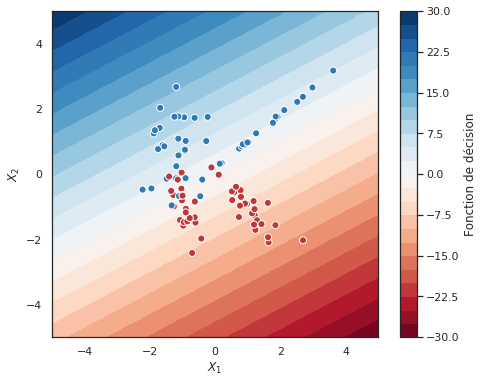

In [109]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
X, y = make_classification(200, 2, 2, 0, weights=[.5, .5], random_state=15)
clf = Perceptron()
clf.fit(X[:100], y[:100])
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.decision_function(grid).reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu" )
ax_c = f.colorbar(contour)
ax_c.set_label("Fonction de décision")

ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")


La fonction de décision n'est pas une probabilité d'appartenance à une classe. le `Perceptron` ne donne pas directement une telle information, mais on peut construire un modèle qui calibre cette information à partir d'un modèle de classification quelconque, grâce à la classe `CalibratedClassifierCV` :

[(-5, 5), Text(0, 0.5, '$X_2$'), (-5, 5), Text(0.5, 0, '$X_1$'), None]

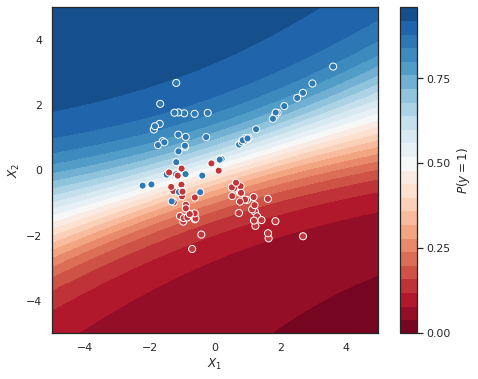

In [134]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
X, y = make_classification(200, 2, 2, 0, weights=[.5, .5], random_state=15)
clf = Perceptron()
clf = CalibratedClassifierCV(clf, cv=10)
clf.fit(X[:100], y[:100])
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")


/home/bernard/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/bernard/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/bernard/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/bernard/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/hom

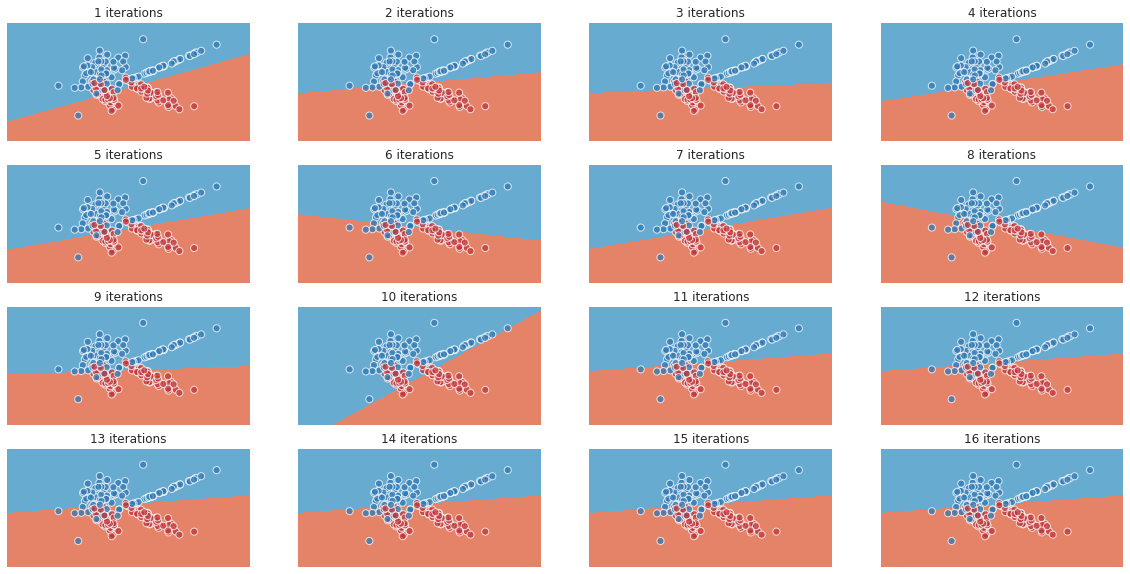

In [153]:
fig, axs = plt.subplots(4,4, figsize=(20, 10))
for max_iter, ax in enumerate(axs.flat, start=1):
    clf = Perceptron(max_iter=max_iter)
    clf.fit(X, y)
    res = clf.predict(grid).reshape(xx.shape)
    contour = ax.contourf(xx, yy, res, 1, cmap="RdBu", vmin=0, vmax=1)
    ax.scatter(X[:,0], X[:, 1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1, alpha=0.75)
    ax.axis('off')
    ax.set_title('{} iterations'.format(max_iter))

/home/bernard/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/bernard/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/bernard/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/bernard/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't co

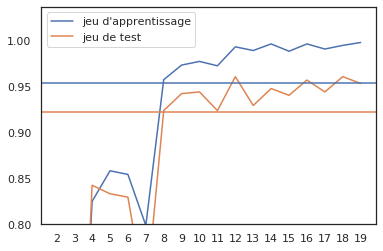

In [160]:
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

percept= Perceptron(verbose=0, random_state=42).fit(X_train, y_train)
percept_train= percept.score(X_train, y_train)
percept_test= percept.score(X_test, y_test)
hl_sizes= range(2,20)
scores_train= []
scores_test= []
for hl_size in hl_sizes:
    clf=MLPClassifier(hidden_layer_sizes=(hl_size,), verbose=0, random_state=42)
    clf.fit(X_train, y_train)
    scores_train.append(clf.score(X_train, y_train))
    scores_test.append(clf.score(X_test, y_test))

sns.lineplot(hl_sizes,scores_train, label="jeu d'apprentissage")
ax= sns.lineplot(hl_sizes,scores_test,label="jeu de test")
cols=sns.color_palette()
plt.axhline(y=percept_train, color=cols[0], linestyle='-')
plt.axhline(y=percept_test, color=cols[1], linestyle='-')
plt.xticks(np.arange(min(hl_sizes), max(hl_sizes)+1, 1))
ax.set_ylim(bottom=0.8)
plt.show()

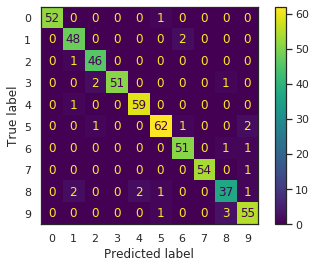

In [161]:
from sklearn import metrics
metrics.plot_confusion_matrix(clf, X_test, y_test)

Automatically created module for IPython interactive environment


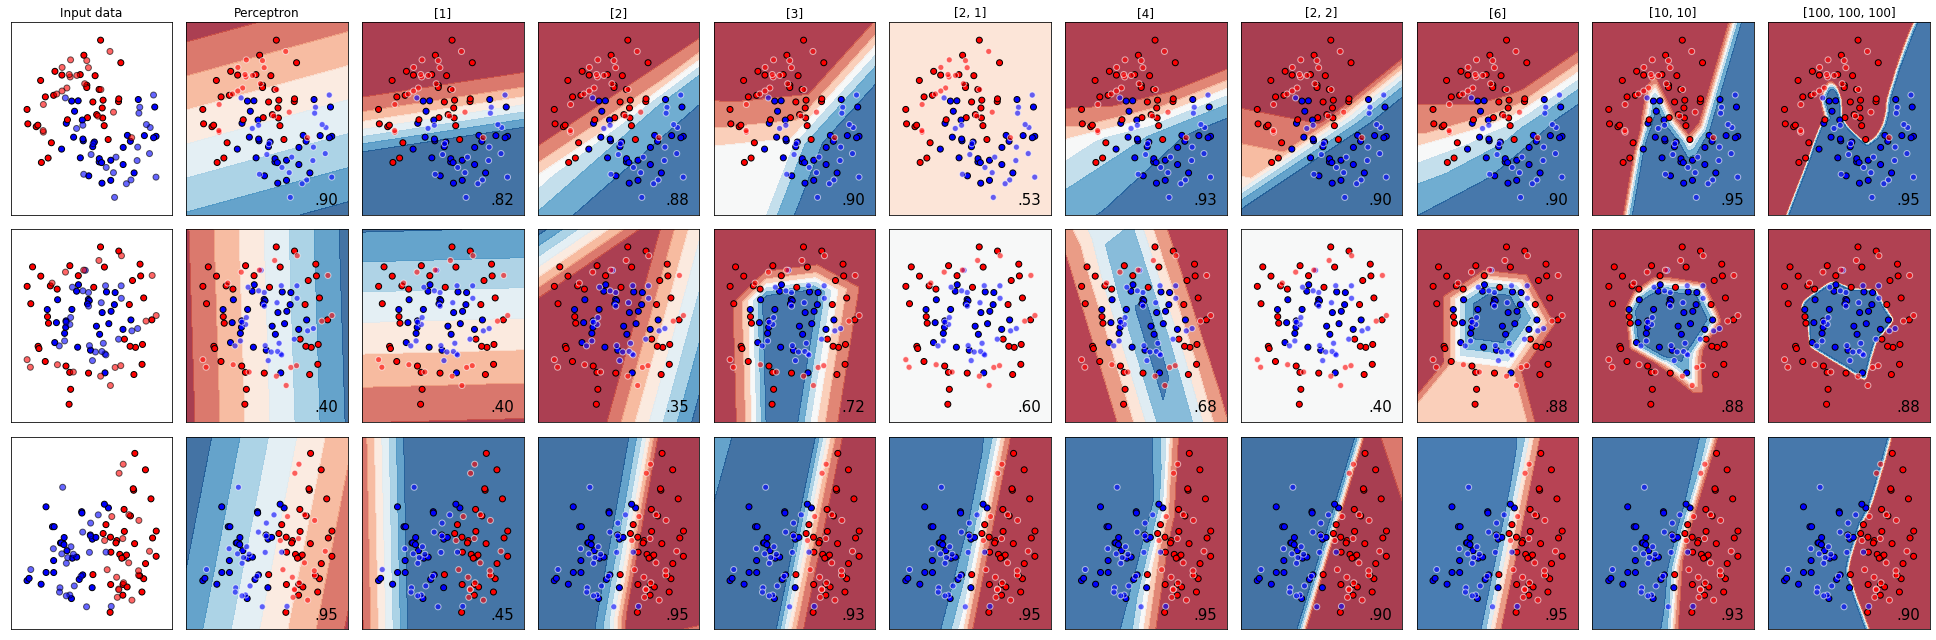

In [4]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# Modified for Perceptron and MLPC by bernard hugueney
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier


h = .02  # step size in the mesh


mlpc_layers=[[1],[2],[3],[2,1],[4],[2,2],[6],[10,10],[100,100,100]]
classifiers=[Perceptron()]+[MLPClassifier(hidden_layer_sizes= layers,max_iter=10000) for layers in mlpc_layers]
names=["Perceptron"]+[str(layers) for layers in mlpc_layers]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='white', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

In [162]:
#from keras.datasets import mnist
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 16s 1us/step


In [199]:
X_train_1d= X_train.reshape(X_train.shape[0],-1)
X_test_1d= X_test.reshape(X_test.shape[0],-1)

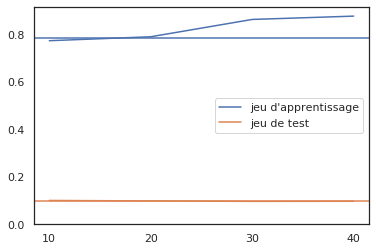

In [201]:
percept= Perceptron(verbose=0, random_state=42).fit(X_train_1d, y_train)
percept_train= percept.score(X_train_1d, y_train)
percept_test= percept.score(X_test_1d, y_test)
hl_sizes= (10,20, 30, 40)#range(2,20)
scores_train= []
scores_test= []
for hl_size in hl_sizes:
    clf=MLPClassifier(hidden_layer_sizes=(hl_size,), verbose=0, random_state=42)
    clf.fit(X_train_1d, y_train)
    scores_train.append(clf.score(X_train_1d, y_train))
    scores_test.append(clf.score(X_test_1d, y_test))

sns.lineplot(hl_sizes,scores_train, label="jeu d'apprentissage")
ax= sns.lineplot(hl_sizes,scores_test,label="jeu de test")
cols=sns.color_palette()
plt.axhline(y=percept_train, color=cols[0], linestyle='-')
plt.axhline(y=percept_test, color=cols[1], linestyle='-')
plt.xticks(hl_sizes)
ax.set_ylim(bottom=0.0)
plt.show()

In [ ]:
percept= Perceptron(verbose=0, random_state=42).fit(X_train_1d, y_train)
percept_train= percept.score(X_train_1d, y_train)
percept_test= percept.score(X_test_1d, y_test)
hl_sizes= (10,20, 30, 40)#range(2,20)
scores_train= []
scores_test= []
for hl_size in hl_sizes:
    clf=MLPClassifier(hidden_layer_sizes=(hl_size,), verbose=0, random_state=42)
    clf.fit(X_train_1d, y_train)
    scores_train.append(clf.score(X_train_1d, y_train))
    scores_test.append(clf.score(X_test_1d, y_test))

sns.lineplot(hl_sizes,scores_train, label="jeu d'apprentissage")
ax= sns.lineplot(hl_sizes,scores_test,label="jeu de test")
cols=sns.color_palette()
plt.axhline(y=percept_train, color=cols[0], linestyle='-')
plt.axhline(y=percept_test, color=cols[1], linestyle='-')
plt.xticks(hl_sizes)
ax.set_ylim(bottom=0.0)
plt.show()

In [20]:
from keras.datasets import fashion_mnist
from keras.datasets import mnist
import keras.backend

((X_train, y_train), (X_test, y_test)) = fashion_mnist.load_data()

In [28]:
X_train.shape

(60000, 28, 28)

In [33]:
def display_imgs(data, n_img_per_row = 10, n_img_per_col = 80):
    (n, w, h)= data.shape
    img = np.zeros(((w+2) * n_img_per_row, (h+2) * n_img_per_col))
    for i in range(n_img_per_row):
        ix = (w+2) * i + 1
        for j in range(n_img_per_col):
            iy = (h+2) * j + 1
            img[ix:ix + w, iy:iy + h] = data[i * n_img_per_row + j].reshape((w,h))
    fig = plt.figure(figsize=(32,8))
    plt.imshow(img, cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.title("{} premiers éléments (sur {}) du jeu de données".format(n_img_per_row*n_img_per_col, n))

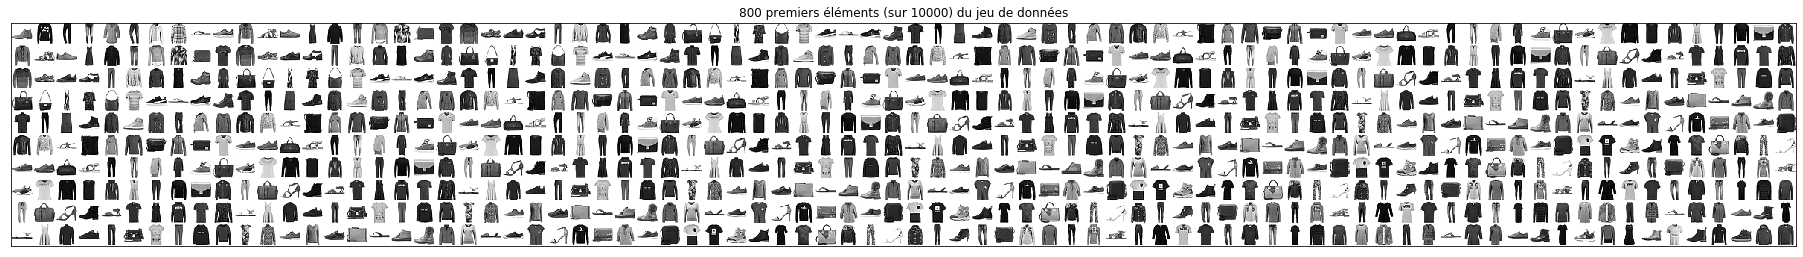

In [34]:
display_imgs(X_test)

In [32]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [37]:
# "channels first" -> num_samples x depth x rows x columns
if keras.backend.image_data_format() == "channels_first":
    X_train = X_train.reshape((X_train.shape[0], 1, 28, 28))
    X_test = X_test.reshape((X_test.shape[0], 1, 28, 28))
else:# "channels last" -> num_samples x rows x columns x depth
    X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
    X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [38]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.optimizers import SGD

def build_basic_model(width, height, depth, classes):
    (input_shape, chan_dim) = ((depth, height, width), 1) if keras.backend.image_data_format() == "channels_first" else ((height, width, depth), -1)
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(classes, activation='softmax'))
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
def build_dropout_model(width, height, depth, classes): # pour digit minst
    (input_shape, chan_dim) = ((depth, height, width), 1) if keras.backend.image_data_format() == "channels_first" else ((height, width, depth), -1)
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    model.add(Dense(128))
    model_dropout.add(Dropout(0.5))
    model.add(Activation('relu'))
    model.add(Dense(128))
    model_dropout.add(Dropout(0.5))
    model.add(Activation('relu'))
    model.add(Dense(classes))
    model.add(Activation('softmax'))
    

In [13]:
from keras.layers.normalization import BatchNormalization
def build_conv_relu_conv_relu_pool(width, height, depth, classes):
    (input_shape, chan_dim) = ((depth, height, width), 1) if keras.backend.image_data_format() == "channels_first" else ((height, width, depth), -1)
    model = Sequential()
    # Premier ensemble Conv → RELU → Conv → RELU → Pool
    model.add(Conv2D(32, (3, 3), padding="same", input_shape=input_shape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis= chan_dim))
    model.add(Conv2D(32, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis= chan_dim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    # Second ensemble Conv → RELU → Conv → RELU → Pool
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    # FC (Fully Connected: Dense) → RELU
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    # softmax classifier
    model.add(Dense(classes))
    model.add(Activation("softmax"))
    return model

In [39]:
model= build_basic_model(28,28,1,10)

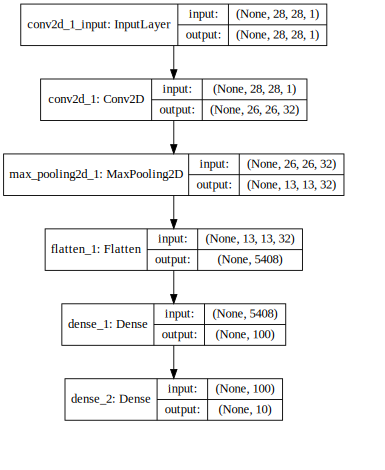

In [10]:
from IPython.display import SVG
from keras.utils import model_to_dot
SVG(model_to_dot(model, show_shapes= True, show_layer_names=True, dpi=65).create(prog='dot', format='svg'))

In [40]:
evaluate_model(model, X_train, y_train)

> 75.083
> 68.842
> 70.067
> 70.325
> 70.625


([0.7508333325386047,
  0.6884166598320007,
  0.7006666660308838,
  0.703249990940094,
  0.706250011920929],
  <keras.callbacks.callbacks.History at 0x7fe4f56812d0>])

In [14]:
NUM_EPOCHS = 25
INIT_LR = 1e-2
BS = 32
opt = SGD(lr=INIT_LR, momentum=0.9, decay=INIT_LR / NUM_EPOCHS)
model2 = build(28,28,1,10)
model2.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
evaluate_model(model2, X_train, y_train)

> 99.300
> 99.683
> 99.817
> 99.833
> 99.933


([0.9929999709129333,
  0.996833324432373,
  0.9981666803359985,
  0.9983333349227905,
  0.9993333220481873],
  <keras.callbacks.callbacks.History at 0x7fe5284cded0>])

In [237]:
from keras.utils import np_utils
NUM_EPOCHS = 25
INIT_LR = 1e-2
BS = 32
opt = SGD(lr=INIT_LR, momentum=0.9, decay=INIT_LR / NUM_EPOCHS)
model = build(28,28,1,10)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
H = model.fit(trainX, trainY, validation_data=(testX, testY),batch_size=BS, epochs=NUM_EPOCHS)
#model_performance(model, "Basic Keras model", X_train, y_train)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
 1472/60000 [..............................] - ETA: 6:56 - loss: 1.4421 - accuracy: 0.5836

KeyboardInterrupt: 

/home/bernard/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/bernard/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/bernard/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/bernard/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't co

/home/bernard/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/bernard/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/bernard/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/bernard/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't co

/home/bernard/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/bernard/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/bernard/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/bernard/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't co

/home/bernard/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/bernard/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/bernard/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/bernard/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't co

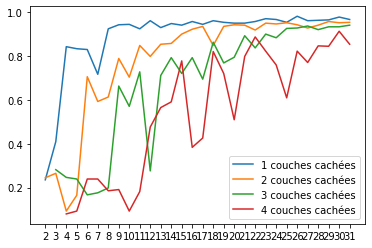

In [61]:
from sklearn.neural_network import MLPClassifier

hl_sizes= range(2,32)

def spread_size(size, n_layers):
    res=[]
    for i in range(n_layers,0, -1):
        res.append(size//i)
        size-= res[-1]
    return res


n_layerss= range(1,5)
for n_layers in n_layerss:
    scores_test= []
    for hl_size in hl_sizes:
        if hl_size >= n_layers :
            clf=MLPClassifier(hidden_layer_sizes=spread_size(hl_size, n_layers), verbose=0, random_state=42)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
            clf.fit(X_train, y_train)
            scores_test.append(clf.score(X_test, y_test))
        else:
            scores_test.append(np.nan)
    sns.lineplot(hl_sizes,scores_test,label="{} couches cachées".format(n_layers))
plt.xticks(np.arange(min(hl_sizes), max(hl_sizes)+1, 1))
plt.show()

In [71]:
clf.predict_proba(X_test).shape

(540, 10)

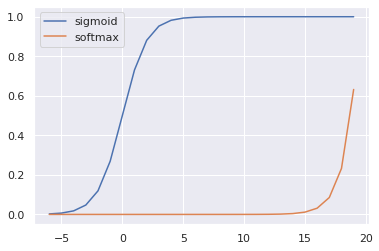

In [23]:
import numpy as np
import seaborn as sns
sns.set()
def sigmoid(X):
    return 1/(1+np.exp(-X))
def relu(X):
    return np.maximum(0,X)
def softmax(X):
    expo = np.exp(X)
    expo_sum = np.sum(np.exp(X), axis=0)
    return expo/expo_sum
x=np.arange(-6,20)
sns.lineplot(x, sigmoid(x), label="sigmoid")
#sns.lineplot(x, relu(x), label="relu")
sns.lineplot(x, softmax(x), label="softmax")

![under/over-fitting](https://i.ibb.co/g35FMM5/over.png)
![overfitting](https://i.ibb.co/gmRzQtr/over-fitting.png)
![fitting](https://i.ibb.co/gmRzQtr/over-fitting.png)
![model complexity](https://i.ibb.co/0cygV4y/Screen-Shot-2018-04-04-at-2-43-37-PM-768x592.png)

In [62]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()  # mode interactif facilite utilisation figures multiples

# définir matrices de rotation et de dilatation
rot = np.array([[0.94, -0.34], [0.34, 0.94]])
sca = np.array([[3.4, 0], [0, 2]])
# générer données classe 1
np.random.seed(150)
c1d = (np.random.randn(100,2)).dot(sca).dot(rot)

# générer données classe 2
c2d1 = np.random.randn(25,2)+[-10, 2]
c2d2 = np.random.randn(25,2)+[-7, -2]
c2d3 = np.random.randn(25,2)+[-2, -6]
c2d4 = np.random.randn(25,2)+[5, -7]

data = np.concatenate((c1d, c2d1, c2d2, c2d3, c2d4))

# générer étiquettes de classe
l1c = np.ones(100, dtype=int)
l2c = np.zeros(100, dtype=int)
labels = np.concatenate((l1c, l2c))

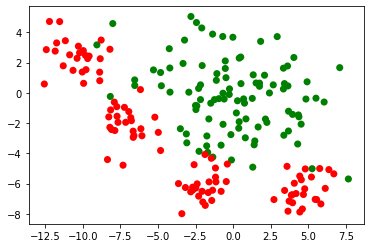

In [63]:
cmp = np.array(['r','g'])
plt.figure()
plt.scatter(data[:,0],data[:,1],c=cmp[labels],s=50,edgecolors='none')


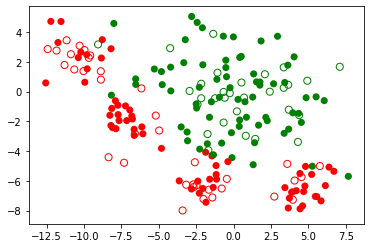

In [64]:
from sklearn.model_selection import train_test_split

plt.figure()
X_train1, X_test1, y_train1, y_test1 = train_test_split(data, labels, test_size=0.33)
plt.scatter(X_train1[:,0],X_train1[:,1],c=cmp[y_train1],s=50,edgecolors='none')
plt.scatter(X_test1[:,0],X_test1[:,1],c='none',s=50,edgecolors=cmp[y_test1])

In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

# évaluation et affichage sur split1
lda.fit(X_train1, y_train1)
lda.score(X_train1, y_train1)

lda.score(X_test1, y_test1)


0.9393939393939394

Text(0.5, 1.0, 'Simplest default with labels')

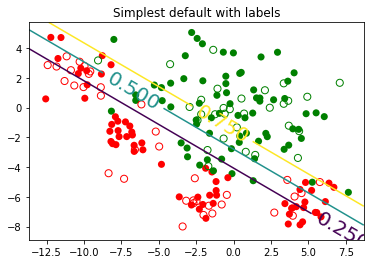

In [77]:
plt.figure()
plt.scatter(X_train1[:,0],X_train1[:,1],c=cmp[y_train1],s=50,edgecolors='none')
plt.scatter(X_test1[:,0],X_test1[:,1],c='none',s=50,edgecolors=cmp[y_test1])
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
cs=plt.contour(xx, yy, Z, [0.25,0.5,0.75],c=)
plt.clabel(cs, inline=1, fontsize=20)
plt.title('Simplest default with labels')

In [ ]:
for decoupage in range(10):
    X_trainv, X_testv, y_trainv, y_testv =
              train_test_split(data, labels, test_size=0.33)
    ldav = LinearDiscriminantAnalysis()
    ldav.fit(X_trainv, y_trainv)
    ldav.score(X_testv, y_testv)

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5)

# évaluation et affichage sur split1
clf.fit(X_train1, y_train1)
clf.score(X_train1, y_train1)

clf.score(X_test1, y_test1)

plt.figure()
plt.scatter(X_train1[:,0],X_train1[:,1],c=cmp[y_train1],s=50,edgecolors='none')
plt.scatter(X_test1[:,0],X_test1[:,1],c='none',s=50,edgecolors=cmp[y_test1])
nx, ny = 200, 200
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.contour(xx, yy, Z, [0.5])



Question :

Refaites l’expérience avec alpha = 1. Dans quel cas la régularisation est plus forte ? Quelle est la conséquence sur les résultats ?

Correction :

La régularisation est plus forte avec alpha = 1 qu’avec alpha = 1e-5, car α

est la pondération du terme de régularisation (ici weight decay). La frontière est plus lisse avec alpha = 1.

Question :

Avec les autres découpages apprentissage / test examinez la variabilité des résultats. Dans quel cas elle est plus forte ?

Correction :

Pour alpha = 1 les résultats obtenus avec clf.score(X_test, y_test) sont plus stables au changement d’échantillon. La variabilité est plus forte pour alpha = 1e-5.


http://cedric.cnam.fr/vertigo/Cours/ml2/tpIntroductionApprentissageSupervise.html#regression-avec-modeles-lineaires-et-pmc

Automatically created module for IPython interactive environment
Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05530788
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355
Training set score: 0.986800
Test set score: 0.970000


/home/bernard/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


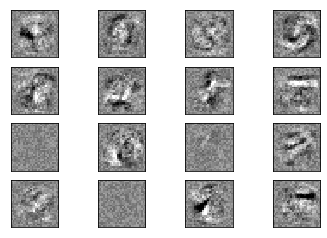

In [45]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

print(__doc__)

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [16]:
help(clf)

Help on Perceptron in module sklearn.linear_model._perceptron object:

class Perceptron(sklearn.linear_model._stochastic_gradient.BaseSGDClassifier)
 |  Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, eta0=1.0, n_jobs=None, random_state=0, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False)
 |  
 |  Perceptron
 |  
 |  Read more in the :ref:`User Guide <perceptron>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  penalty : None, 'l2' or 'l1' or 'elasticnet'
 |      The penalty (aka regularization term) to be used. Defaults to None.
 |  
 |  alpha : float
 |      Constant that multiplies the regularization term if regularization is
 |      used. Defaults to 0.0001
 |  
 |  fit_intercept : bool
 |      Whether the intercept should be estimated or not. If False, the
 |      data is assumed to be already centered. Defaults to True.
 |  
 |  max_iter : int, optional (default=1000)


In [1]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

NameError: name 'y' is not defined

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

from keras import backend as K
K.tensorflow_backend._get_available_gpus()

# Initialising the ANN
classifier = Sequential()


ModuleNotFoundError: No module named 'keras'

In [ ]:
# Adding the Single Perceptron or Shallow network
classifier.add(Dense(output_dim=128, init='uniform', activation='relu', input_dim=30))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))
# Adding the output layer
classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))

In [ ]:
# criterion loss and optimizer 
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size=100, nb_epoch=150)


In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/
https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

In [234]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K

class MiniVGGNet:
	@staticmethod
	def build(width, height, depth, classes):
		# initialize the model along with the input shape to be
		# "channels last" and the channels dimension itself
		model = Sequential()
		inputShape = (height, width, depth)
		chanDim = -1

		# if we are using "channels first", update the input shape
		# and channels dimension
		if K.image_data_format() == "channels_first":
			inputShape = (depth, height, width)
			chanDim = 1

		# first CONV => RELU => CONV => RELU => POOL layer set
		model.add(Conv2D(32, (3, 3), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(32, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))

		# second CONV => RELU => CONV => RELU => POOL layer set
		model.add(Conv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))

		# first (and only) set of FC => RELU layers
		model.add(Flatten())
		model.add(Dense(512))
		model.add(Activation("relu"))
		model.add(BatchNormalization())
		model.add(Dropout(0.5))

		# softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))

		# return the constructed network architecture
		return model

In [235]:
# import the necessary packages
from sklearn.metrics import classification_report
from keras.optimizers import SGD
from keras.datasets import fashion_mnist
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

# initialize the number of epochs to train for, base learning rate,
# and batch size
NUM_EPOCHS = 25
INIT_LR = 1e-2
BS = 32

# grab the Fashion MNIST dataset (if this is your first time running
# this the dataset will be automatically downloaded)
print("[INFO] loading Fashion MNIST...")
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

# if we are using "channels first" ordering, then reshape the design
# matrix such that the matrix is:
# 	num_samples x depth x rows x columns
if K.image_data_format() == "channels_first":
	trainX = trainX.reshape((trainX.shape[0], 1, 28, 28))
	testX = testX.reshape((testX.shape[0], 1, 28, 28))
 
# otherwise, we are using "channels last" ordering, so the design
# matrix shape should be: num_samples x rows x columns x depth
else:
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
 
# scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

# one-hot encode the training and testing labels
trainY = np_utils.to_categorical(trainY, 10)
testY = np_utils.to_categorical(testY, 10)

# initialize the label names
labelNames = ["top", "trouser", "pullover", "dress", "coat",
	"sandal", "shirt", "sneaker", "bag", "ankle boot"]

# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=INIT_LR, momentum=0.9, decay=INIT_LR / NUM_EPOCHS)
model = MiniVGGNet.build(width=28, height=28, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# train the network
print("[INFO] training model...")
H = model.fit(trainX, trainY,
	validation_data=(testX, testY),
	batch_size=BS, epochs=NUM_EPOCHS)

# make predictions on the test set
preds = model.predict(testX)

# show a nicely formatted classification report
print("[INFO] evaluating network...")
print(classification_report(testY.argmax(axis=1), preds.argmax(axis=1),
	target_names=labelNames))

# plot the training loss and accuracy
N = NUM_EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

# initialize our list of output images
images = []

# randomly select a few testing fashion items
for i in np.random.choice(np.arange(0, len(testY)), size=(16,)):
	# classify the clothing
	probs = model.predict(testX[np.newaxis, i])
	prediction = probs.argmax(axis=1)
	label = labelNames[prediction[0]]
 
	# extract the image from the testData if using "channels_first"
	# ordering
	if K.image_data_format() == "channels_first":
		image = (testX[i][0] * 255).astype("uint8")
 
	# otherwise we are using "channels_last" ordering
	else:
		image = (testX[i] * 255).astype("uint8")

	# initialize the text label color as green (correct)
	color = (0, 255, 0)

	# otherwise, the class label prediction is incorrect
	if prediction[0] != np.argmax(testY[i]):
		color = (0, 0, 255)
 
	# merge the channels into one image and resize the image from
	# 28x28 to 96x96 so we can better see it and then draw the
	# predicted label on the image
	image = cv2.merge([image] * 3)
	image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
	cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75,
		color, 2)

	# add the image to our list of output images
	images.append(image)

# construct the montage for the images
montage = build_montages(images, (96, 96), (4, 4))[0]

# show the output montage
cv2.imshow("Fashion MNIST", montage)
cv2.waitKey(0)

[INFO] loading Fashion MNIST...
[INFO] compiling model...
[INFO] training model...
Train on 60000 samples, validate on 10000 samples
Epoch 1/25
14912/60000 [======>.......................] - ETA: 4:35 - loss: 0.7838 - accuracy: 0.7512

KeyboardInterrupt: 